In [2]:
import numpy as np,pandas as pd,seaborn as sns,math as ma
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
raw_data=pd.read_csv("walmart_data.csv")

In [4]:
raw_data.shape

(550068, 10)

In [5]:
raw_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [6]:
#Finding null values
raw_data.isnull().sum(axis=0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [7]:
raw_data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [8]:
#Converting the purchase data to millions
raw_data['Purchase']=raw_data['Purchase']/1000000

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

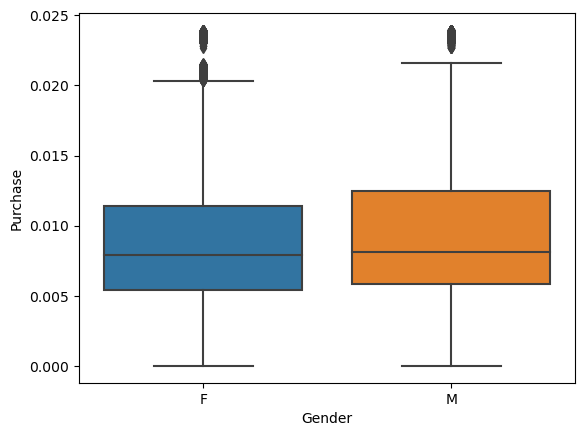

In [9]:
#Identifyinf outliers
sns.boxplot(data=raw_data,y='Purchase',x='Gender')

C:\Users\denms\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

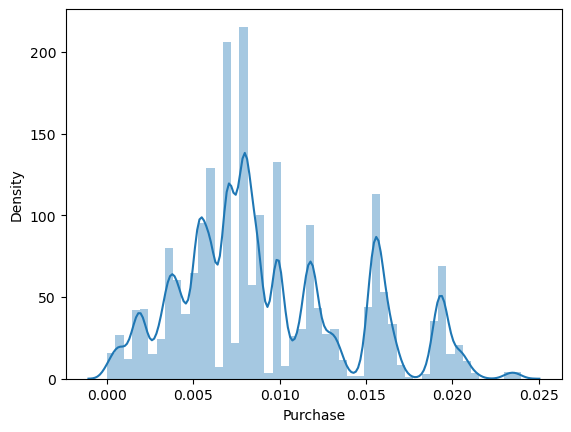

In [10]:
#Seeing distribution of Purchase data
sns.distplot(raw_data['Purchase'])

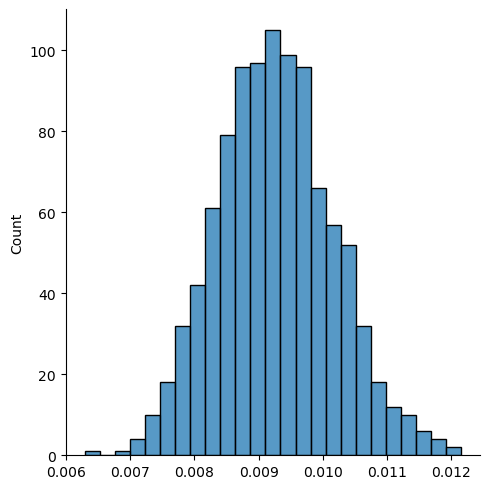

In [11]:
nor_data=[np.mean(raw_data['Purchase'].sample(30)) for _ in range(1000)]
sns.displot(nor_data)

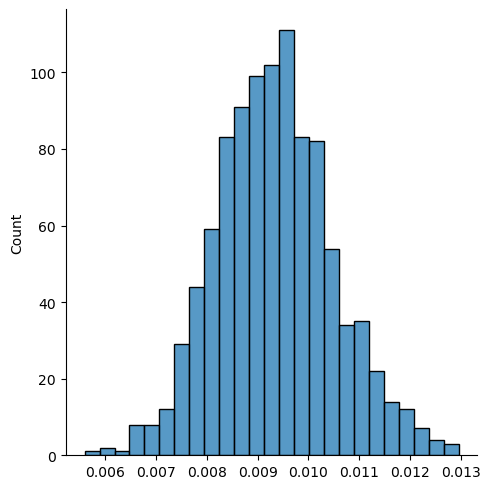

In [12]:
nor_data=[np.mean(raw_data['Purchase'].sample(20)) for _ in range(1000)]
sns.displot(nor_data)

<AxesSubplot:>

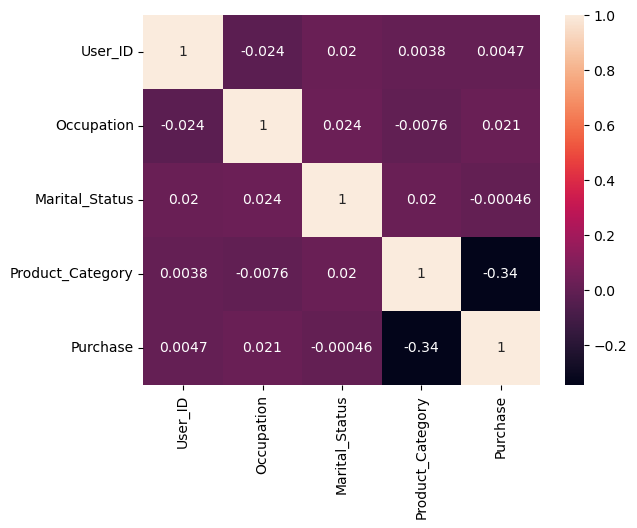

In [13]:
#Cheching for co relations
sns.heatmap(raw_data.corr(),annot=True)

In [14]:
#sns.pairplot(data=raw_data,hue='Gender')

C:\Users\denms\AppData\Local\Temp\ipykernel_13984\2502080502.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_g=raw_data.groupby(by=['Gender','Age'])['Gender','Age','Purchase'].sum().reset_index()


C:\Users\denms\AppData\Local\Temp\ipykernel_13984\3137083759.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_g=raw_data.groupby(by=['Gender','Age'])['Gender','Age','Purchase'].sum().reset_index()


Text(0, 0.5, 'Purchase total in Millions')

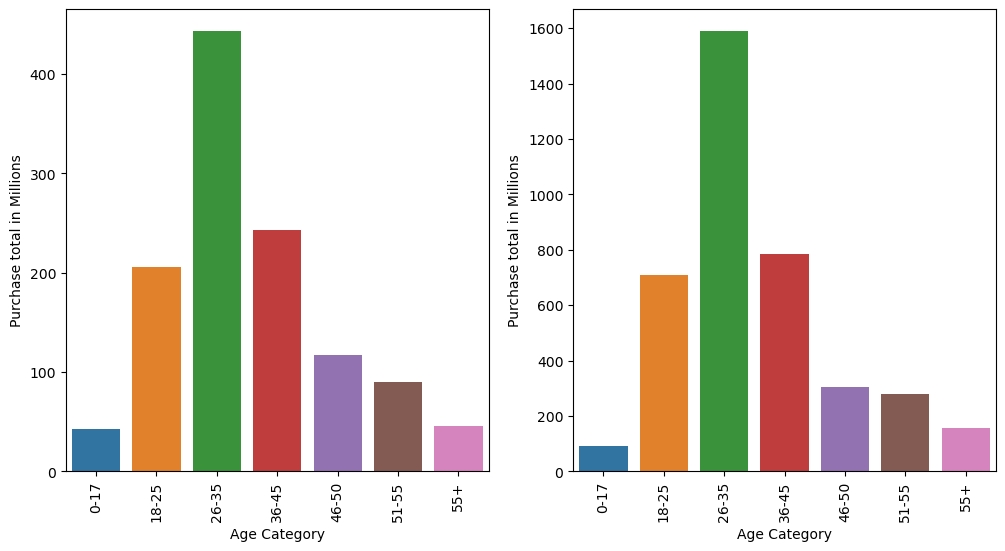

In [20]:
#Comparing Purchase data based on Age group for male and female
data_g=raw_data.groupby(by=['Gender','Age'])['Gender','Age','Purchase'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=data_g[data_g['Gender']=='F'],x='Age',y='Purchase')
plt.xticks(rotation=90)
plt.xlabel("Age Category")
plt.ylabel('Purchase total in Millions' )


plt.subplot(1,2,2)
sns.barplot(data=data_g[data_g['Gender']=='M'],x='Age',y='Purchase')
plt.xticks(rotation=90)
plt.xlabel("Age Category")
plt.ylabel('Purchase total in Millions' )

In [21]:
raw_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.008370
1,1000001,P00248942,F,0-17,10,A,2,0,1,0.015200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.001422
3,1000001,P00085442,F,0-17,10,A,2,0,12,0.001057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.007969


Text(0, 0.5, 'Purchase total in Millions')

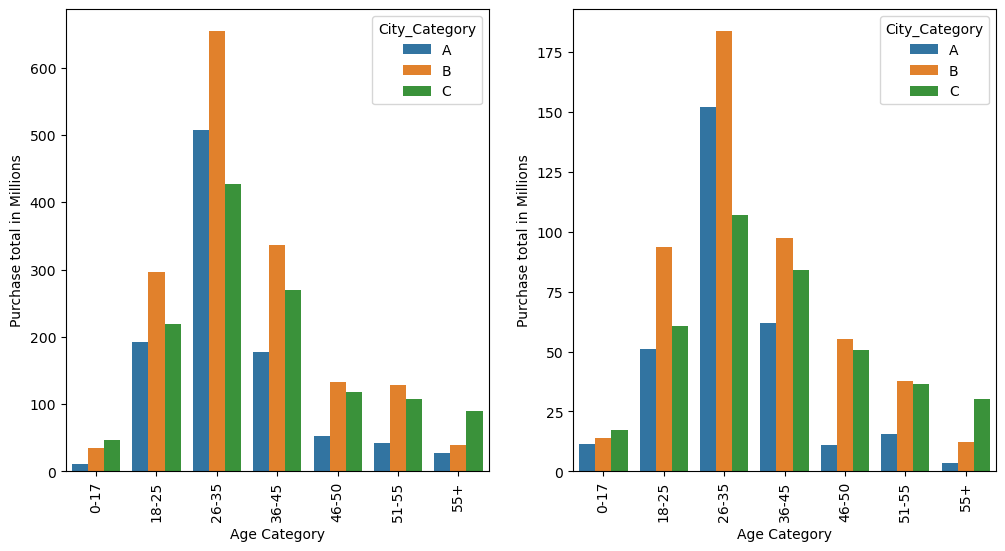

In [38]:
#Categorizine based on CIty and age category
data_c=raw_data.groupby(by=['Gender','City_Category','Age'])['Purchase'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=data_c[data_c['Gender']=='M'],x='Age',y='Purchase',hue='City_Category')
plt.xticks(rotation=90)
plt.xlabel("Age Category")
plt.ylabel('Purchase total in Millions' )

plt.subplot(1,2,2)
sns.barplot(data=data_c[data_c['Gender']=='F'],x='Age',y='Purchase',hue='City_Category')
plt.xticks(rotation=90)
plt.xlabel("Age Category")
plt.ylabel('Purchase total in Millions' )

Text(0, 0.5, 'Purchase total in Millions')

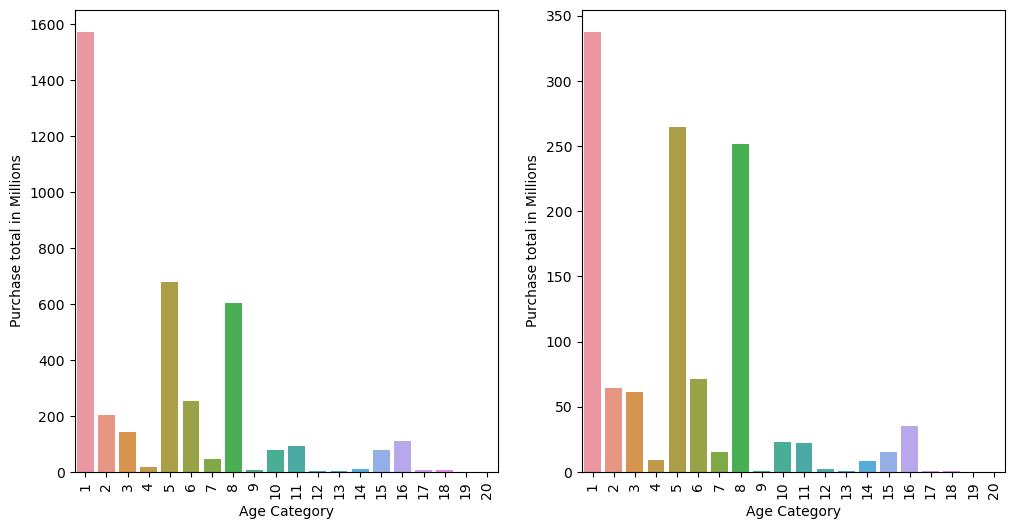

In [45]:
data_top_10_spend=raw_data.groupby(by=['Gender','Product_Category']).sum().reset_index()

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data=data_top_10_spend[data_top_10_spend['Gender']=='M'].reset_index(),x='Product_Category',y='Purchase')
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel('Purchase total in Millions' )


plt.subplot(1,2,2)
sns.barplot(data=data_top_10_spend[data_top_10_spend['Gender']=='F'].reset_index(),x='Product_Category',y='Purchase')
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel('Purchase total in Millions' )

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

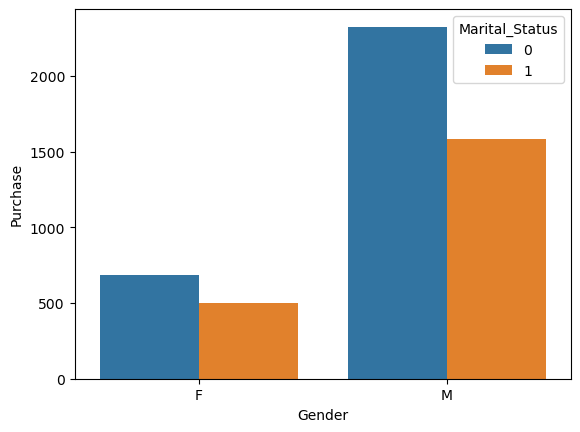

In [47]:
# Purchase of Married and un married people 
data_marr=raw_data.groupby(by=['Gender','Marital_Status'])['Purchase'].sum().reset_index()
sns.barplot(data=data_marr,x='Gender',y='Purchase',hue='Marital_Status')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

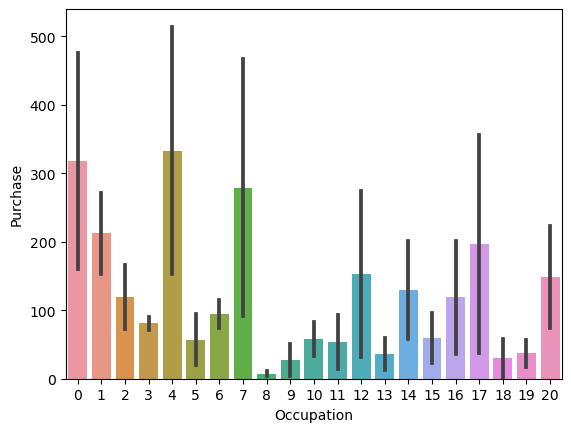

In [48]:
data_occ=raw_data.groupby(by=['Gender','Occupation'])['Purchase'].sum().reset_index()
sns.barplot(data=data_occ,x='Occupation',y='Purchase')

In [49]:
raw_data=pd.read_csv("walmart_data.csv")

In [50]:
data_male=raw_data[raw_data['Gender']=='M']['Purchase']
data_female=raw_data[raw_data['Gender']=='F']['Purchase']

male_mean=np.mean(data_male)
male_std=np.std(data_male)

female_mean=np.mean(data_female)
female_std=np.std(data_female)

ci=[90,95,99]

for i in ci:
    
    z_male=abs(norm.ppf(i/200))
    z_female=abs(norm.ppf(i/200))
    
    mx1=male_mean-(z_male*(male_std/ma.sqrt(len(data_male))))
    mx2=male_mean+(z_male*(male_std/ma.sqrt(len(data_male))))
    
    fx1=female_mean-(z_female*(female_std/ma.sqrt(len(data_female))))
    fx2=female_mean+(z_female*(female_std/ma.sqrt(len(data_female))))
    
    print(f'''For Width {i}%,
            CI for male is ({mx1},{mx2}), 
            CI for female is ({fx1},{fx2}) ''')

For Width 90%,
            CI for male is (9436.531850253066,9438.520230691463), 
            CI for female is (8732.94020801288,8736.191322298071) 
For Width 95%,
            CI for male is (9437.029925581975,9438.022155362554), 
            CI for female is (8733.754589298094,8735.376941012857) 
For Width 99%,
            CI for male is (9437.426879886218,9437.625201058312), 
            CI for female is (8734.40363199846,8734.72789831249) 


In [51]:
data_marr=raw_data[raw_data['Marital_Status']==1]['Purchase']
data_not_marr=raw_data[raw_data['Marital_Status']==0]['Purchase']

marr_mean=np.mean(data_marr)
marr_std=np.std(data_not_marr)

not_marr_mean=np.mean(data_female)
not_marr_std=np.std(data_female)

ci=[90,95,99]

for i in ci:
    
    z_marr=abs(norm.ppf(i/200))
    z_not_marr=abs(norm.ppf(i/200))
    
    mx1=marr_mean-(z_marr*(marr_std/ma.sqrt(len(data_marr))))
    mx2=marr_mean+(z_marr*(marr_std/ma.sqrt(len(data_marr))))
    
    nx1=not_marr_mean-(z_not_marr*(not_marr_std/ma.sqrt(len(data_not_marr))))
    nx2=not_marr_mean+(z_not_marr*(not_marr_std/ma.sqrt(len(data_not_marr))))
    
    print(f'''For Width {i}%,
            CI for Married is ({mx1},{mx2}), 
            CI for Not Married  is ({nx1},{nx2}) ''')

For Width 90%,
            CI for Married is (9259.8437405838,9262.505407580948), 
            CI for Not Married  is (8733.514518465352,8735.6170118456) 
For Width 95%,
            CI for Married is (9260.51046946498,9261.838678699767), 
            CI for Not Married  is (8734.041178284406,8735.090352026546) 
For Width 99%,
            CI for Married is (9261.041836677497,9261.30731148725), 
            CI for Not Married  is (8734.460913753945,8734.670616557007) 


In [52]:
age=['0-17','18-25','26-35','36-45','46-50','51-55','55+']

for cat in age:
    data_age=raw_data[raw_data['Age']==cat]['Purchase']


    age_mean=np.mean(data_age)
    age_std=np.std(data_age)

    ci=[90,95,99]

    for i in ci:
    
        z_age=abs(norm.ppf(i/200))
        mx1=age_mean-(z_age*(age_std/ma.sqrt(len(data_age))))
        mx2=age_mean+(z_age*(age_std/ma.sqrt(len(data_age))))

    
        print(f'''For Width {i}%,
                CI for Age category {cat} is ({mx1},{mx2}), 
                ''')

For Width 90%,
                CI for Age category 0-17 is (8928.238444727805,8938.690836162143), 
                
For Width 95%,
                CI for Age category 0-17 is (8930.856695340723,8936.072585549226), 
                
For Width 99%,
                CI for Age category 0-17 is (8932.943379402468,8933.98590148748), 
                
For Width 90%,
                CI for Age category 18-25 is (9167.659687645912,9171.667524876666), 
                
For Width 95%,
                CI for Age category 18-25 is (9168.663622712045,9170.663589810532), 
                
For Width 99%,
                CI for Age category 18-25 is (9169.463735310586,9169.863477211991), 
                
For Width 90%,
                CI for Age category 26-35 is (9251.346999313193,9254.034266426583), 
                
For Width 95%,
                CI for Age category 26-35 is (9252.020140843617,9253.361124896159), 
                
For Width 99%,
                CI for Age category 26-35 is (9252.55